In [1]:
import polars as pl

In [2]:
import os
os.listdir('../kkdata')

['light_test_source_labels.csv',
 'light_train_source_labels.csv',
 'light_train_target_labels.csv',
 'sample.csv',
 'test_source_events.csv',
 'train_source_events.csv',
 'train_target_events.csv']

In [3]:
from pathlib import Path
for p in Path('../kkdata').glob('*'):
    print(p)

..\kkdata\light_test_source_labels.csv
..\kkdata\light_train_source_labels.csv
..\kkdata\light_train_target_labels.csv
..\kkdata\sample.csv
..\kkdata\test_source_events.csv
..\kkdata\train_source_events.csv
..\kkdata\train_target_events.csv


In [4]:
df_source = pl.read_csv("../kkdata/train_source_events.csv")
df_target = pl.read_csv("../kkdata/train_target_events.csv")

In [5]:
df_target.shape

(374170, 10)

In [6]:
df_source.shape

(9714103, 10)

In [7]:
df_source.columns

['user_id',
 'device_id',
 'session_id',
 'title_id',
 'event_time',
 'played_duration',
 'action_trigger',
 'platform',
 'title_in_simulcast',
 'internet_connection_type']

In [8]:
df_target.columns

['user_id',
 'device_id',
 'session_id',
 'title_id',
 'event_time',
 'played_duration',
 'action_trigger',
 'platform',
 'title_in_simulcast',
 'internet_connection_type']

In [9]:
df_target.columns == df_source.columns

True

### How many unique user id?

In [10]:
len(set(df_source['user_id']))

30460

In [11]:
len(set(df_source['user_id']))

30460

In [12]:
df_source['user_id'].unique().shape[0]

30460

In [13]:
df_target['user_id'].unique().shape[0]

30460

In [14]:
print(df_source.columns)

['user_id', 'device_id', 'session_id', 'title_id', 'event_time', 'played_duration', 'action_trigger', 'platform', 'title_in_simulcast', 'internet_connection_type']


In [15]:
df_source.describe()

describe,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",9.714103e6,9.714103e6,9.714103e6,9.714103e6,9.714103e6,9.714103e6,9.714103e6,9.714103e6,9.714103e6,9.714103e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",15333.388016,70125.333662,2.1198e6,621.729785,1.6526e9,962.180728,1.318401,0.808483,0.40129,2.008922
"""std""",8857.883822,40736.610848,1.2206e6,890.0741,6.7707e6,2592.890024,2.501955,0.900307,0.491486,1.588802
"""min""",0.0,0.0,0.0,0.0,1.6410e9,1.0,0.0,0.0,0.0,0.0
"""25%""",7654.0,35069.0,1.060623e6,74.0,1.6462e9,57.0,0.0,0.0,0.0,1.0
"""50%""",15263.0,69639.0,2.120013e6,239.0,1.6535e9,603.0,1.0,1.0,0.0,1.0
"""75%""",23018.0,105460.0,3.179921e6,758.0,1.6586e9,1424.0,1.0,1.0,1.0,3.0
"""max""",30459.0,140513.0,4.226481e6,6101.0,1.6634e9,2.06549e6,13.0,3.0,2.0,11.0


In [16]:
df_target['event_time'].min()

1663376400.336

### How many total play time?

In [17]:
df_source['played_duration'].sum()

9346722696

### Time interval?

In [18]:
df_source['event_time'].min()

1640998801.205

In [19]:
df_source['event_time'].max()

1663376398.588

In [20]:
df_source['event_time'].describe()

statistic,value
str,f64
"""count""",9.714103e6
"""null_count""",0.0
"""mean""",1.6526e9
"""std""",6.7707e6
"""min""",1.6410e9
"""25%""",1.6462e9
"""50%""",1.6535e9
"""75%""",1.6586e9
"""max""",1.6634e9


In [21]:
(df_source['event_time'].max()-df_source['event_time'].min())/60

372959.9563833356

In [22]:
et = df_source['event_time']
(et.max()-et.min())/60/60/24/7

36.999995672949964

In [23]:
et = df_target['event_time']
(et.max()-et.min())/60/60/24/7

0.9999933746693627

In [24]:
et.max()

1663981196.329

In [25]:
import datetime
datetime.datetime.fromtimestamp(1662166796.329)

datetime.datetime(2022, 9, 3, 8, 59, 56, 329000)

In [26]:
et = df_source['event_time']


In [27]:
pl.from_epoch("event_time", time_unit="s")

In [28]:
df_target[['event_time']].with_columns(
       pl.from_epoch("event_time", time_unit="s")
)

event_time
datetime[μs]
2022-09-17 11:29:17
2022-09-17 11:30:00
2022-09-17 11:33:57
2022-09-17 12:26:05
2022-09-17 12:46:43
2022-09-17 13:04:27
2022-09-17 13:06:21
2022-09-18 13:44:53
2022-09-19 13:00:55


### How many event per user?

In [29]:
df_source.group_by('user_id').count().sort(by='count')

user_id,count
i64,u32
16304,1
20800,1
12144,1
19617,1
13361,1
6737,1
22545,1
26769,1
28210,1


In [30]:
# total time by user
df_target[['user_id', 'played_duration']].group_by('user_id').sum().sort('played_duration')

user_id,played_duration
i64,i64
27872,1
7712,1
1536,1
4304,1
15056,1
3170,1
21170,1
6098,1
2307,1


In [31]:
486812/60/60/24

5.634398148148148

In [32]:
source_total = df_source[['user_id', 'played_duration']].group_by('user_id').sum()
target_total = df_target[['user_id', 'played_duration']].group_by('user_id').sum()

In [33]:
df_total = source_total.join(target_total, on='user_id')
df_total

user_id,played_duration,played_duration_right
i64,i64,i64
11360,534198,54308
14400,59376,28885
18624,48863,2749
23104,3783,66
25008,589859,5949
21664,2090526,63215
23408,94480,1563
27648,724453,57035
22128,162605,1498


In [34]:
%matplotlib inline

In [35]:
import matplotlib.pyplot as plt

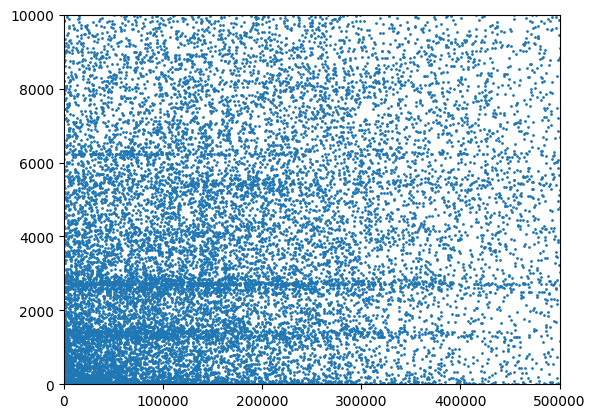

In [36]:
plt.xlim(0, 500000)
plt.ylim(0, 10000)
plt.scatter(df_total['played_duration'], df_total['played_duration_right'], s=1)

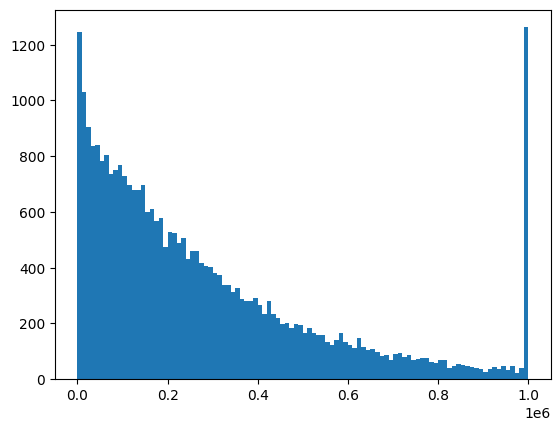

In [37]:
plt.hist(df_total['played_duration'].clip(0, 1000000), bins=100);

In [38]:
df_total.describe([0.05, 0.5, 0.95])

describe,user_id,played_duration,played_duration_right
str,f64,f64,f64
"""count""",30460.0,30460.0,30460.0
"""null_count""",0.0,0.0,0.0
"""mean""",15229.5,306852.353775,12065.788247
"""std""",8793.188936,379116.98106,18612.75255
"""min""",0.0,1.0,1.0
"""5%""",1523.0,12544.0,85.0
"""50%""",15230.0,204118.0,6148.0
"""95%""",28937.0,921558.0,43682.0
"""max""",30459.0,1.1995926e7,486812.0


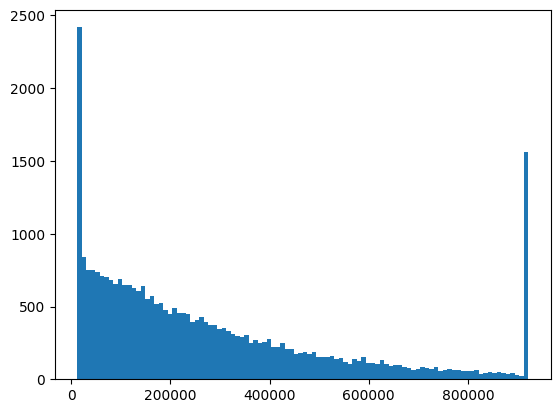

In [39]:
plt.hist(df_total['played_duration'].clip(12544,921558), bins=100);

In [40]:
(df_total['played_duration']/3600).round()

played_duration
f64
148.0
16.0
14.0
1.0
164.0
581.0
26.0
201.0
45.0


In [41]:
#df_total['played_duration_hour'] = (df_total['played_duration']/3600).round()
df_total = df_total.with_columns( played_hour = (df_total['played_duration']/3600).round())
df_total

user_id,played_duration,played_duration_right,played_hour
i64,i64,i64,f64
11360,534198,54308,148.0
14400,59376,28885,16.0
18624,48863,2749,14.0
23104,3783,66,1.0
25008,589859,5949,164.0
21664,2090526,63215,581.0
23408,94480,1563,26.0
27648,724453,57035,201.0
22128,162605,1498,45.0


In [42]:
df_total_gb = df_total[['played_duration_right', 'played_hour']].group_by('played_hour').mean().sort('played_hour')
df_total_gb

played_hour,played_duration_right
f64,f64
0.0,7124.806667
1.0,5906.935065
2.0,7063.103535
3.0,6752.316216
4.0,6043.69086
5.0,6334.935754
6.0,6131.73817
7.0,5983.666667
8.0,6722.218354


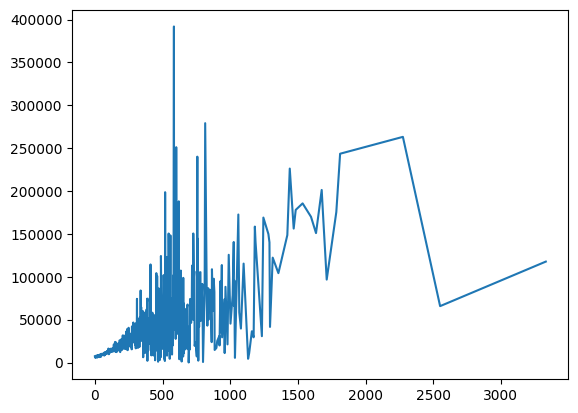

In [43]:
plt.plot(df_total_gb['played_hour'], df_total_gb['played_duration_right'])

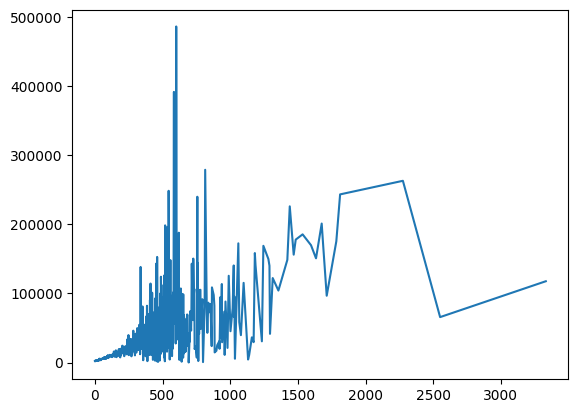

In [44]:
df_total_gb = df_total[['played_duration_right', 'played_hour']].group_by('played_hour').quantile(0.5).sort('played_hour')
plt.plot(df_total_gb['played_hour'], df_total_gb['played_duration_right'])

In [45]:
df_source_count = df_source.group_by('user_id').count()
df_target_count = df_target.group_by('user_id').count()
df_count = df_source_count.join(df_target_count, on='user_id')
df_count

user_id,count,count_right
i64,u32,u32
27248,368,16
20576,91,10
19808,139,16
4048,48,2
17088,82,9
6944,177,1
10480,352,7
13104,790,48
19616,2,3


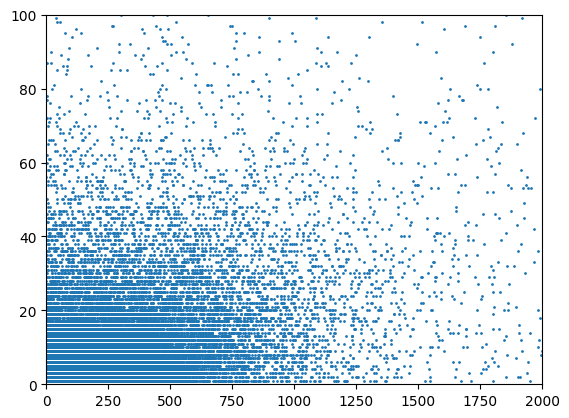

In [46]:
plt.xlim(0, 2000)
plt.ylim(0, 100)
plt.scatter(df_count['count'], df_count['count_right'], s=1)

### Similarity between users
#### How to represent a user?

In [47]:
# df_source[df_source.user_id == 0]
df_source.filter((pl.col('user_id')==0) &  (pl.col('title_id')==212))['played_duration'].sum()

0

In [51]:
group_by_key = ["user_id", "title_id"]
df_ = df_source[group_by_key+["played_duration"]].sort(by='title_id').group_by(["user_id", "title_id"]).sum()
df_

user_id,title_id,played_duration
i64,i64,i64
0,0,30201
745,0,37747
934,0,27006
1231,0,27292
1246,0,10835
1543,0,25840
1655,0,24051
1845,0,19852
2144,0,10207


In [50]:
df_ = df_.pivot(values="played_duration", index="user_id", columns="title_id").fill_null(0)
df_

user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,5082,5336,5356,5418,5459,5534,5538,5608,5637,5666,5769,5824,5870,5873,5894,5897,5960,5997,6052,6080,2245,2521,3282,4832,4940,5002,5120,5169,5540,5660,5664,5670,5675,6034,6050,6063,6094
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,30201,0,0,0,56004,24669,2811,503,0,0,0,6921,2645,0,12280,0,5001,0,0,0,0,25072,0,0,0,0,0,70296,49567,60,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
745,37747,0,5268,0,0,0,0,0,0,0,0,0,0,0,0,0,7180,0,0,0,0,0,0,4159,0,0,0,36711,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
934,27006,0,0,34781,0,0,28814,15611,0,0,17,3623,0,0,0,0,0,0,0,0,0,0,3310,0,0,0,0,0,40814,7029,0,0,35675,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1231,27292,0,0,17184,0,20739,0,24677,623,69756,0,0,0,0,21249,0,0,0,0,0,0,0,0,3695,916,0,0,37247,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1246,10835,0,0,2955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1543,25840,1346,22722,0,0,0,0,0,0,0,0,0,0,0,0,0,1525,0,0,0,0,0,182,0,0,0,0,0,0,0,0,0,0,0,0,421,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1655,24051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1845,19852,0,166,19621,8812,6529,0,15393,0,0,0,14827,0,0,13956,0,0,11097,0,0,0,0,0,12465,179,35,32,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2144,10207,2480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5338,0,0,0,0,0,12,0,0,0,0,0,1002,0,0,0,0,21840,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
A = df_[df_.columns[1:]].to_numpy()
A

array([[30201,     0,     0, ...,     0,     0,     0],
       [37747,     0,  5268, ...,     0,     0,     0],
       [27006,     0,     0, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=int64)

In [57]:
import numpy as np
A = A / np.linalg.norm(A, axis=1, keepdims=True)
A

array([[0.15549228, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35745349, 0.        , 0.04988648, ..., 0.        , 0.        ,
        0.        ],
       [0.12096315, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [58]:
D = A[:100] @ A.T

In [59]:
np.fill_diagonal(D, 0)
D.argmax(axis=1)

array([25049, 15029, 21993, 14755, 25087, 24354, 10770,  7107,  8446,
       30222, 20215, 29932, 29315, 27226,  8329, 19542, 14704, 23216,
       26792, 14080,  9016,  4073, 23637,  5602, 16102,  1949, 19138,
        5006,  9590, 13042, 20685, 10793,  1931, 12208, 10308, 29786,
        7811, 13264, 17670, 30352,  4024, 12044, 17065,  6255, 20642,
       12341,  2526, 11659,  9065, 14583,  9322,  1018, 18095, 26385,
       18200,  6506, 13874, 29970, 25420,    64,  4913,  3519,  9342,
         702, 30012, 25052,  9261, 14755,  3889,  3393, 14315, 10575,
       26714,  4248, 11570,   230, 22000,  1743,  3979, 27646, 22927,
       12192, 25036, 25776,  1051,  1587,   698, 30332,   714, 28609,
        7871, 17270, 17380,  9664,  7341, 20516, 26134,    64,  9799,
       27569], dtype=int64)

In [60]:
X = A[672]
print(X.argsort()[-20:])
print(X[X.argsort()[-10:]])

[ 36  28 228 482 165   8  17 294 203 119 171  64  27 144 178   4  67   3
   6  95]
[0.16531533 0.201759   0.20935747 0.21667767 0.22950313 0.2704357
 0.30265664 0.31095689 0.31868847 0.55259581]


In [61]:
Y = A[0]
print(Y.argsort()[-20:])
print(Y[X.argsort()[-10:]])

[215 281  62 662  43   5  21 495 470 585   0 667 195 203  28 148   4  27
 145 284]
[0.         0.07714633 0.36192462 0.         0.         0.2883411
 0.02897106 0.         0.01447266 0.        ]


In [62]:
X = A[21993]
Y = A[2]
C = set(X.nonzero()[0]) & set(Y.nonzero()[0])
print(C)
set(X.argsort()[-20:]) & set(Y.argsort()[-20:]) & C

{3, 6, 28, 32, 163, 675, 37, 165, 294, 171, 299, 178, 64, 67, 206, 80, 337, 215, 228, 111, 1402}


{3, 6, 28, 32, 80, 165, 206, 1402}

In [63]:
set(Y.nonzero()[0])

{0,
 3,
 6,
 7,
 10,
 11,
 22,
 28,
 29,
 32,
 37,
 55,
 58,
 64,
 66,
 67,
 69,
 71,
 78,
 80,
 82,
 93,
 94,
 111,
 112,
 114,
 118,
 120,
 122,
 139,
 147,
 157,
 162,
 163,
 164,
 165,
 171,
 178,
 186,
 206,
 213,
 215,
 228,
 265,
 294,
 299,
 304,
 329,
 337,
 353,
 363,
 370,
 380,
 394,
 397,
 416,
 429,
 452,
 476,
 480,
 487,
 554,
 558,
 588,
 599,
 609,
 639,
 653,
 658,
 675,
 678,
 736,
 784,
 789,
 826,
 835,
 852,
 965,
 971,
 1067,
 1085,
 1113,
 1164,
 1193,
 1207,
 1274,
 1310,
 1343,
 1387,
 1402,
 1451,
 1528,
 1639,
 1726,
 1748,
 1847,
 1949,
 2097,
 2278,
 2708}

In [64]:
set(A[0].nonzero()[0]) & set(A[672].nonzero()[0])

{4, 6, 7, 11, 27, 28, 42, 64, 67, 133, 159, 203, 215, 354, 838}

In [ ]:
set(A[15029].nonzero()[0]) & set(A[1].nonzero()[0])

In [ ]:
set(A[0].nonzero()[0]) & set(A[25049].nonzero()[0])

## Lazy Dataframe

user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type
i64,i64,i64,i64,f64,i64,i64,i64,i64,i64
0,525,2328,384,1.6489e9,1361,1,0,0,1
0,525,2328,384,1.6489e9,2,0,0,0,1
0,525,2400,68,1.6490e9,2,0,0,0,1
0,525,2400,68,1.6490e9,20,9,0,0,1
0,532,2401,68,1.6490e9,8,10,2,1,4
0,532,2401,68,1.6490e9,19,10,2,1,4
0,532,2403,68,1.6490e9,2432,10,2,1,4
0,532,2403,68,1.6490e9,297,1,2,1,4
0,532,2403,68,1.6490e9,4,10,2,1,4


### backup plan

In [65]:

df_source = pl.read_csv("../kkdata/train_source_events.csv")
group_by_key = ["user_id", "title_id"]
df_ = df_source[group_by_key+["played_duration"]].sort(by='title_id').group_by(["user_id", "title_id"]).sum()
df_ = df_.pivot(values="played_duration", index="user_id", columns="title_id").fill_null(0)

In [74]:

group_by_key = ["user_id", "title_id"]
query_plan = (pl.scan_csv("../kkdata/train_source_events.csv").select(group_by_key+["played_duration"])
    .sort(by='title_id')
    .group_by(["user_id", "title_id"])
    .sum()
)
query_plan

<LazyFrame [3 cols, {"user_id": Int64 … "played_duration": Int64}] at 0x1F4B7ABD4D0>

In [75]:
query_plan.collect().pivot(values="played_duration", index="user_id", columns="title_id").fill_null(0)

user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,5082,5336,5356,5418,5459,5534,5538,5608,5637,5666,5769,5824,5870,5873,5894,5897,5960,5997,6052,6080,2245,2521,3282,4832,4940,5002,5120,5169,5540,5660,5664,5670,5675,6034,6050,6063,6094
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,30201,0,0,0,56004,24669,2811,503,0,0,0,6921,2645,0,12280,0,5001,0,0,0,0,25072,0,0,0,0,0,70296,49567,60,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
745,37747,0,5268,0,0,0,0,0,0,0,0,0,0,0,0,0,7180,0,0,0,0,0,0,4159,0,0,0,36711,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
934,27006,0,0,34781,0,0,28814,15611,0,0,17,3623,0,0,0,0,0,0,0,0,0,0,3310,0,0,0,0,0,40814,7029,0,0,35675,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1231,27292,0,0,17184,0,20739,0,24677,623,69756,0,0,0,0,21249,0,0,0,0,0,0,0,0,3695,916,0,0,37247,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1246,10835,0,0,2955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1543,25840,1346,22722,0,0,0,0,0,0,0,0,0,0,0,0,0,1525,0,0,0,0,0,182,0,0,0,0,0,0,0,0,0,0,0,0,421,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1655,24051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1845,19852,0,166,19621,8812,6529,0,15393,0,0,0,14827,0,0,13956,0,0,11097,0,0,0,0,0,12465,179,35,32,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2144,10207,2480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5338,0,0,0,0,0,12,0,0,0,0,0,1002,0,0,0,0,21840,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:

plan_source_count = (
    pl.scan_csv("../kkdata/train_source_events.csv")
    .group_by('user_id')
    .count()
)
plan_target_count = (
    pl.scan_csv("../kkdata/train_target_events.csv")
    .group_by('user_id')
    .count()
)
plan_count = plan_source_count.join(plan_target_count, on='user_id')
plan_count

<LazyFrame [3 cols, {"user_id": Int64 … "count_right": UInt32}] at 0x1F4B605FB10>

In [79]:

plan_target_count = (
    pl.scan_csv("../kkdata/train_target_events.csv")
    .group_by('user_id')
    .count()
)
plan_count = (
    pl.scan_csv("../kkdata/train_source_events.csv")
    .group_by('user_id')
    .count()
    .join(plan_target_count, on='user_id')
)
plan_count

<LazyFrame [3 cols, {"user_id": Int64 … "count_right": UInt32}] at 0x1F4BFFA6250>

In [81]:
plan_count = (
    pl.scan_csv("../kkdata/train_source_events.csv")
    .group_by('user_id')
    .count()
    .join(on='user_id',
          other=pl.scan_csv("../kkdata/train_target_events.csv")
                  .group_by('user_id')
                  .count()
          )
)
plan_count

<LazyFrame [3 cols, {"user_id": Int64 … "count_right": UInt32}] at 0x1F4C0E3E690>

In [82]:
def count_plan(fn):
    return (
        pl.scan_csv(fn)
        .group_by('user_id')
        .count()
    )
plan_count = count_plan("../kkdata/train_source_events.csv").join(
    on='user_id',
    other=count_plan("../kkdata/train_target_events.csv")
)
plan_count

<LazyFrame [3 cols, {"user_id": Int64 … "count_right": UInt32}] at 0x1F4B7A50A50>

In [86]:
print(plan_count.explain())

INNER JOIN:
LEFT PLAN ON: [col("user_id")]
  AGGREGATE
  	[count()] BY [col("user_id")] FROM

      Csv SCAN ../kkdata/train_source_events.csv
      PROJECT 1/10 COLUMNS
RIGHT PLAN ON: [col("user_id")]
  AGGREGATE
  	[count()] BY [col("user_id")] FROM

      Csv SCAN ../kkdata/train_target_events.csv
      PROJECT 1/10 COLUMNS
END INNER JOIN


In [55]:
group_by_key = ["user_id", "title_id"]
df_source = pl.read_csv("../kkdata/train_source_events.csv")
df_ = df_source[group_by_key+["played_duration"]].sort(by='title_id').group_by(["user_id", "title_id"]).sum()
df_ = df_.pivot(values="played_duration", index="user_id", columns="title_id").fill_null(0)

In [71]:

group_by_key = ["user_id", "title_id"]
query_plan = (pl
    .scan_csv("../kkdata/train_source_events.csv")
    .select(group_by_key+["played_duration"])
    .sort(by='title_id')
    .group_by(["user_id", "title_id"])
    .sum()
)
query_plan

<LazyFrame [3 cols, {"user_id": Int64 … "played_duration": Int64}] at 0x1DAE0AD6750>

In [72]:
(query_plan
 .collect()
 .pivot(values="played_duration", index="user_id", columns="title_id")
 .fill_null(0)
)

user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,5082,5336,5356,5418,5459,5534,5538,5608,5637,5666,5769,5824,5870,5873,5894,5897,5960,5997,6052,6080,2245,2521,3282,4832,4940,5002,5120,5169,5540,5660,5664,5670,5675,6034,6050,6063,6094
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,30201,0,0,0,56004,24669,2811,503,0,0,0,6921,2645,0,12280,0,5001,0,0,0,0,25072,0,0,0,0,0,70296,49567,60,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
745,37747,0,5268,0,0,0,0,0,0,0,0,0,0,0,0,0,7180,0,0,0,0,0,0,4159,0,0,0,36711,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
934,27006,0,0,34781,0,0,28814,15611,0,0,17,3623,0,0,0,0,0,0,0,0,0,0,3310,0,0,0,0,0,40814,7029,0,0,35675,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1231,27292,0,0,17184,0,20739,0,24677,623,69756,0,0,0,0,21249,0,0,0,0,0,0,0,0,3695,916,0,0,37247,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1246,10835,0,0,2955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1543,25840,1346,22722,0,0,0,0,0,0,0,0,0,0,0,0,0,1525,0,0,0,0,0,182,0,0,0,0,0,0,0,0,0,0,0,0,421,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1655,24051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1845,19852,0,166,19621,8812,6529,0,15393,0,0,0,14827,0,0,13956,0,0,11097,0,0,0,0,0,12465,179,35,32,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2144,10207,2480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5338,0,0,0,0,0,12,0,0,0,0,0,1002,0,0,0,0,21840,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
